In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import pdist, squareform, cdist

In [17]:
def prepare_data(path):
    data = pd.read_csv(path)
    data.drop(columns=data.columns[len(data.columns)-1], axis=1, inplace=True)
    data = data.drop(columns=['id'])
    y = data['diagnosis']
    X = data.drop(columns='diagnosis')
    y = np.where(y == 'M', 1, 0)
    return X, y

def prepare_moodle_data(path):
    data = pd.read_csv(path)
    data.drop(columns=data.columns[0], axis=1, inplace=True)
    y = data['y']
    X = data.drop(columns=['y'])
    return X, y

In [ ]:
# Load a dataset (e.g., Iris dataset)
X, y = prepare_data("data_cancer.csv")

# Split the data into training and testing sets
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)


regularization_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
gammas = [0.1, 0.01, 0.001]
# Define the parameter grid for the grid search
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],  # Kernels: linear, radial basis function (RBF), polynomial
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]      # σ (gamma) parameter for RBF kernel
}
model = SVC()
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", gs.best_params_)
print("Best Accuracy: {:.2f}%".format(gs.best_score_ * 100))

# Make predictions on the scaled test set using the best model
best_svm_model = gs.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

[[   0.     1040.0625 1156.     ...  351.5625    9.      264.0625]
 [1040.0625    0.        3.0625 ...  182.25   1242.5625  256.    ]
 [1156.        3.0625    0.     ...  232.5625 1369.      315.0625]
 ...
 [ 351.5625  182.25    232.5625 ...    0.      473.0625    6.25  ]
 [   9.     1242.5625 1369.     ...  473.0625    0.      370.5625]
 [ 264.0625  256.      315.0625 ...    6.25    370.5625    0.    ]]
[[  45.5625  650.25    742.5625 ...  144.       95.0625   90.25  ]
 [ 182.25    351.5625  420.25   ...   27.5625  272.25      7.5625]
 [1425.0625   30.25     14.0625 ...  361.     1660.5625  462.25  ]
 ...
 [  60.0625  600.25    689.0625 ...  121.      115.5625   72.25  ]
 [   2.25    945.5625 1056.25   ...  297.5625   20.25    217.5625]
 [ 841.       10.5625   25.     ...  105.0625 1024.      162.5625]]
60
60
[[   0.     1040.0625 1156.     ...  351.5625    9.      264.0625]
 [1040.0625    0.        3.0625 ...  182.25   1242.5625  256.    ]
 [1156.        3.0625    0.     ...  232.562

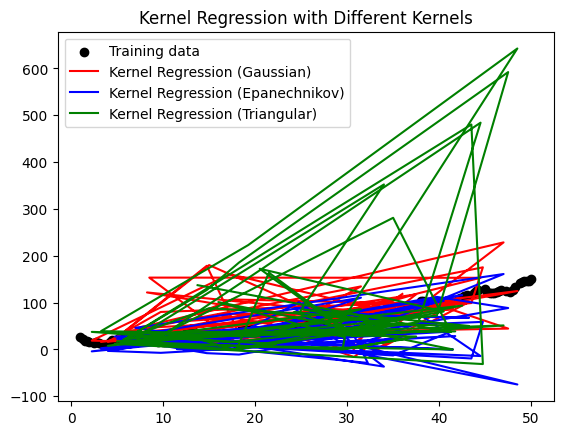

In [40]:
def kernel_regression(X_train, y_train, X_test, kernel_function, bandwidth):
    # Compute the kernel matrix
    K = kernel_matrix(X_train, X_train, kernel_function, bandwidth)
    
    # Compute alpha = K^-1 * y
    inverted = np.linalg.inv(K)
    alpha = inverted.dot(y_train)
    
    # Compute the kernel matrix between test and training points
    K_star = kernel_matrix(X_test, X_train, kernel_function, bandwidth)
    
    # Compute predictions for the test points: y(z) = k* * alpha
    y_pred = np.dot(K_star, alpha)
    
    return y_pred

def kernel_matrix(X1, X2, kernel_function, bandwidth):
    # Compute distances
    distances = cdist(X1, X2, 'sqeuclidean')
    # Apply the kernel function to the distances
    kernel_values = kernel_function(distances / bandwidth)
    
    return kernel_values

def gaussian_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

def epanechnikov_kernel(u):
    return 0.75 * (1 - u**2) * (np.abs(u) <= 1)

def triangular_kernel(u):
    return (1 - np.abs(u)) * (np.abs(u) <= 1)

X, y = prepare_moodle_data("data_moodle.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Perform kernel regression using Gaussian Kernel
bandwidth = 0.2
y_pred_gaussian = kernel_regression(X_train, y_train, X_test, gaussian_kernel, bandwidth)
print(len(y_pred_gaussian))
print(len(X_test))

# Perform kernel regression using Epanechnikov Kernel
y_pred_epanechnikov = kernel_regression(X_train, y_train, X_test, epanechnikov_kernel, bandwidth)

# Perform kernel regression using Triangular Kernel
y_pred_triangular = kernel_regression(X_train, y_train, X_test, triangular_kernel, bandwidth)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='black', label='Training data')
plt.plot(X_test, y_pred_gaussian, color='red', label='Kernel Regression (Gaussian)')
plt.plot(X_test, y_pred_epanechnikov, color='blue', label='Kernel Regression (Epanechnikov)')
plt.plot(X_test, y_pred_triangular, color='green', label='Kernel Regression (Triangular)')
plt.title('Kernel Regression with Different Kernels')
plt.legend()
plt.show()

In [ ]:
X, y = prepare_data("data_moodle.csv")
print(X)
print(y)